In [10]:
import pandas as pd
import numpy as np
import json
import os
from matplotlib import pyplot as plt

In [11]:
def data_preprocessing(data) :
    Y = data[["x_coord", "y_coord"]].values
    X = data[["left_ear", "right_ear", "left_pupil", "right_pupil"]]
    for i in range(0, 6) :
#         if i != 0 and i != 3:
#             continue
        right_name = "right_pupil_" + str(i + 1)
        left_name = "left_pupil_" + str(i + 1)
        X[right_name] = X["right_pupil"].apply(lambda x : 1 / x[i])
        X[left_name] = X["left_pupil"].apply(lambda x : 1 / x[i])
    X.drop(["left_pupil", "right_pupil"], axis = 1, inplace = True)
    ret_X = X.values
    return X, X.columns, ret_X, Y

In [12]:
def read_data(root_path) :
    data = None
    for folder in os.listdir(root_path) :
        if folder.find("Images") != -1 :
            df = pd.read_json(root_path + folder + "/data.json")
            if data is None :
                data = df
            else :
                data = pd.concat([data, df])
    return data

In [13]:
from keras.layers import Dense, Input, Dropout
from keras.optimizers import Adam
from keras.models import Sequential
from keras.regularizers import l2

In [14]:
model = Sequential()
model.add(Input(shape=(14,)))
model.add(Dense(14, activation = "relu"))#, kernel_regularizer = l2(0.05)))
model.add(Dense(128, activation = "relu", kernel_regularizer = l2(0.03)))
model.add(Dropout(0.1))
model.add(Dense(256, activation = "relu"))#, kernel_regularizer = l2(0.03)))
model.add(Dense(128, activation = "relu"))#, kernel_regularizer = l2(0.03)))
model.add(Dense(64, activation = "relu", kernel_regularizer = l2(0.05)))
model.add(Dense(32, activation = "relu"))#, kernel_regularizer = l2(0.05)))
# model.add(Dropout(0.2))
model.add(Dense(16, activation = "relu"))#, kernel_regularizer = l2(0.05)))
model.add(Dense(2, activation = "relu"))#, kernel_regularizer = l2(0.05)))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 14)                210       
_________________________________________________________________
dense_9 (Dense)              (None, 128)               1920      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_11 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_12 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_13 (Dense)             (None, 32)               

In [15]:
adam = Adam(lr=0.009)
model.compile(optimizer= adam, loss="mse", metrics=["mse"])

In [16]:
#train data
data = read_data("Preprocessed Output/")
data, train_columns, X_train, Y_train = data_preprocessing(data)

from sklearn.utils import shuffle
X_train, Y_train = shuffle(X_train, Y_train)

<ipython-input-11-707217439ab7>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[right_name] = X["right_pupil"].apply(lambda x : 1 / x[i])
<ipython-input-11-707217439ab7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[left_name] = X["left_pupil"].apply(lambda x : 1 / x[i])


In [17]:
data.head()

,left_ear,right_ear,right_pupil_1,left_pupil_1,right_pupil_2,left_pupil_2,right_pupil_3,left_pupil_3,right_pupil_4,left_pupil_4,right_pupil_5,left_pupil_5,right_pupil_6,left_pupil_6
0,0.468321,0.467559,0.265306,0.220000,0.153061,0.110000,0.102041,0.140000,0.204082,0.250000,0.122449,0.140000,0.153061,0.140000
1,0.489414,0.479247,0.257426,0.196078,0.148515,0.088235,0.099010,0.137255,0.198020,0.264706,0.138614,0.166667,0.158416,0.147059
2,0.380298,0.444188,0.311828,0.284211,0.172043,0.147368,0.064516,0.094737,0.161290,0.200000,0.096774,0.094737,0.193548,0.178947
3,0.501544,0.477273,0.315789,0.250000,0.189474,0.140000,0.052632,0.090000,0.147368,0.210000,0.084211,0.110000,0.210526,0.200000
4,0.468321,0.499871,0.329897,0.270000,0.195876,0.150000,0.051546,0.100000,0.134021,0.200000,0.082474,0.100000,0.206186,0.180000


In [18]:
history = model.fit(X_train, Y_train, validation_split=0.25, epochs =200)

Epoch 1/200
151/151 [==============================] - 2s 6ms/step - loss: 153520.7596 - mse: 153517.7077 - val_loss: 46684.7773 - val_mse: 46682.3516
Epoch 2/200
151/151 [==============================] - 1s 4ms/step - loss: 45227.3202 - mse: 45224.9813 - val_loss: 42137.1016 - val_mse: 42134.8320
Epoch 3/200
151/151 [==============================] - 1s 4ms/step - loss: 42994.7868 - mse: 42992.5788 - val_loss: 42970.2305 - val_mse: 42968.0547
Epoch 4/200
151/151 [==============================] - 1s 4ms/step - loss: 41721.1028 - mse: 41718.9271 - val_loss: 41118.7188 - val_mse: 41116.4766
Epoch 5/200
151/151 [==============================] - 1s 4ms/step - loss: 27209.5650 - mse: 27206.6435 - val_loss: 16335.4473 - val_mse: 16331.5195
Epoch 6/200
151/151 [==============================] - 1s 4ms/step - loss: 10656.0792 - mse: 10652.1536 - val_loss: 8726.2402 - val_mse: 8722.3203
Epoch 7/200
151/151 [==============================] - 1s 5ms/step - loss: 8311.6443 - mse: 8307.7511 - va

151/151 [==============================] - 1s 4ms/step - loss: 4503.4360 - mse: 4494.3762 - val_loss: 4797.4404 - val_mse: 4788.3647
Epoch 58/200
151/151 [==============================] - 1s 4ms/step - loss: 5287.3781 - mse: 5278.1878 - val_loss: 4145.4966 - val_mse: 4136.2524
Epoch 59/200
151/151 [==============================] - 1s 4ms/step - loss: 4495.7208 - mse: 4486.4452 - val_loss: 6307.8164 - val_mse: 6298.4448
Epoch 60/200
151/151 [==============================] - 1s 4ms/step - loss: 4451.0800 - mse: 4441.6748 - val_loss: 4463.4531 - val_mse: 4453.9370
Epoch 61/200
151/151 [==============================] - 1s 4ms/step - loss: 4500.4809 - mse: 4490.9038 - val_loss: 6030.5337 - val_mse: 6020.8145
Epoch 62/200
151/151 [==============================] - 1s 4ms/step - loss: 4616.7073 - mse: 4606.9155 - val_loss: 4664.3599 - val_mse: 4654.5571
Epoch 63/200
151/151 [==============================] - 1s 4ms/step - loss: 4570.2096 - mse: 4560.3420 - val_loss: 4402.3413 - val_mse: 4

Epoch 169/200
151/151 [==============================] - 1s 4ms/step - loss: 3576.1132 - mse: 3558.0726 - val_loss: 4040.4990 - val_mse: 4022.4578
Epoch 170/200
151/151 [==============================] - 1s 4ms/step - loss: 3618.7899 - mse: 3600.7307 - val_loss: 4436.5122 - val_mse: 4418.3394
Epoch 171/200
151/151 [==============================] - 1s 4ms/step - loss: 3683.4941 - mse: 3665.3201 - val_loss: 3649.6211 - val_mse: 3631.2866
Epoch 172/200
151/151 [==============================] - 1s 4ms/step - loss: 3471.4486 - mse: 3453.0727 - val_loss: 4683.2471 - val_mse: 4664.7090
Epoch 173/200
151/151 [==============================] - 1s 4ms/step - loss: 3752.4836 - mse: 3733.8724 - val_loss: 4212.8149 - val_mse: 4194.0552
Epoch 174/200
151/151 [==============================] - 1s 4ms/step - loss: 3560.8275 - mse: 3542.0698 - val_loss: 3583.8000 - val_mse: 3565.0068
Epoch 175/200
151/151 [==============================] - 1s 4ms/step - loss: 3407.1116 - mse: 3388.3046 - val_loss: 40

In [19]:
history

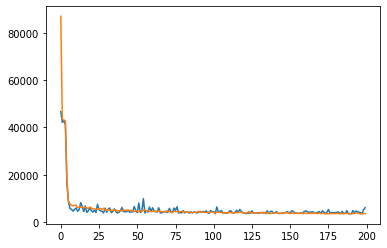

In [20]:
plt.plot(history.history["val_loss"])
plt.plot(history.history["loss"])
plt.show()

In [21]:
data[data["left_ear"] <= 0.3]

,left_ear,right_ear,right_pupil_1,left_pupil_1,right_pupil_2,left_pupil_2,right_pupil_3,left_pupil_3,right_pupil_4,left_pupil_4,right_pupil_5,left_pupil_5,right_pupil_6,left_pupil_6
43,0.219492,0.193596,0.314607,0.311594,0.101124,0.210145,0.089888,0.086957,0.258427,0.028986,0.112360,0.115942,0.123596,0.246377
154,0.176589,0.191489,0.282609,0.333333,0.086957,0.201550,0.108696,0.093023,0.293478,0.069767,0.130435,0.085271,0.097826,0.217054
747,0.290396,0.373440,0.179775,0.233333,0.056180,0.100000,0.179775,0.133333,0.314607,0.277778,0.213483,0.133333,0.056180,0.122222
752,0.290396,0.350190,0.181818,0.300000,0.045455,0.166667,0.181818,0.088889,0.318182,0.233333,0.215909,0.066667,0.056818,0.144444
767,0.288604,0.366372,0.161290,0.138298,0.053763,0.021277,0.193548,0.180851,0.322581,0.361702,0.225806,0.223404,0.043011,0.074468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1927,0.278108,0.308985,0.307692,0.268817,0.125000,0.118280,0.096154,0.096774,0.221154,0.258065,0.115385,0.118280,0.134615,0.139785
1928,0.282542,0.275588,0.310000,0.304348,0.130000,0.163043,0.090000,0.054348,0.240000,0.206522,0.110000,0.076087,0.120000,0.195652
1932,0.260808,0.264003,0.316327,0.329670,0.112245,0.186813,0.091837,0.043956,0.244898,0.186813,0.112245,0.043956,0.122449,0.208791
1987,0.288818,0.313679,0.349515,0.318681,0.165049,0.175824,0.058252,0.054945,0.194175,0.186813,0.077670,0.065934,0.155340,0.197802


In [22]:
def get_acc(Y_preds, Y, n) :
    acc = np.sum(np.sqrt(np.sum(np.power(Y_x - Y_preds, 2), axis = 1))) / n

In [23]:
# dense3.get_weights()

In [24]:
# preds = model.predict(X_test)
# for i in range(preds.shape[0]):
#     print(preds[i])
#     print(Y_test[i])

In [25]:
model.save("models/model10.h5")

In [26]:
metadata = {}
metadata["columns"] = train_columns.tolist()


file = open("models/model10.data", "+w")
file.write(json.dumps(metadata))
file.close()